### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()


2022-10-30 23:43:40.773684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Look at EIN counts for binning 
application_df.EIN.value_counts()


10520599     1
626274659    1
630475330    1
630416100    1
630357662    1
            ..
383880377    1
383876652    1
383874900    1
383871370    1
996086871    1
Name: EIN, Length: 34299, dtype: int64

In [3]:
# Drop the non-beneficial ID column'EIN'
application_df = application_df.drop(['EIN'],1)
application_df.head()


/var/folders/_4/yxrk63bj4z96czgx2nw_v8jh0000gn/T/ipykernel_98673/457447257.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(['EIN'],1)


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at NAME value counts for binning 
application_df.NAME.value_counts()


PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

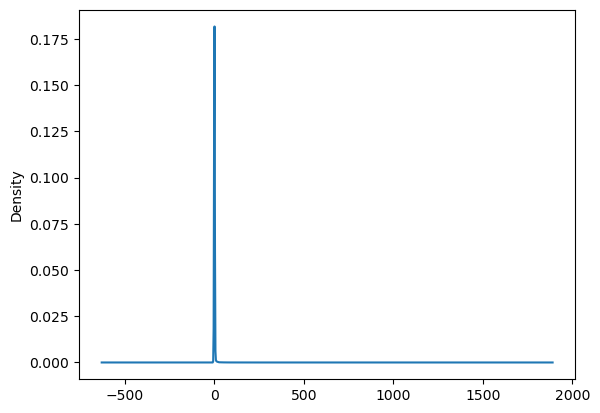

In [6]:
# Visualize the value counts of NAME
name_counts = application_df.NAME.value_counts()
name_counts.plot.density()


In [7]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name_counts[name_counts < 2].index)

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name, "Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()


Other                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [8]:
# Look at SPECIAL_CONSIDERATIONS value counts for binning
special_consideration_counts = application_df.SPECIAL_CONSIDERATIONS.value_counts()
special_consideration_counts


N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

<AxesSubplot:ylabel='Density'>

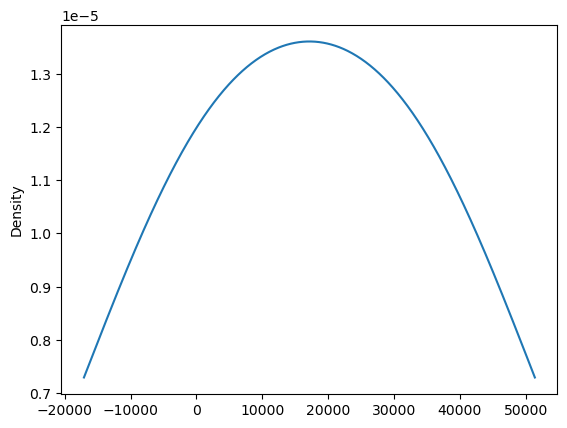

In [9]:
# Visualize the value counts of SPECIAL_CONSIDERATIONS
special_consideration_counts.plot.density()


In [10]:
# # Determine which values to replace if counts are less than ..?
# replace_class = list(special_consideration_counts[special_consideration_counts < 1800].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.SPECIAL_CONSIDERATIONS = application_df.SPECIAL_CONSIDERATIONS.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.SPECIAL_CONSIDERATIONS.value_counts()


In [11]:
# Look at INCOME_AMT value counts for binning
income_amt_counts = application_df.INCOME_AMT.value_counts()
income_amt_counts


0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

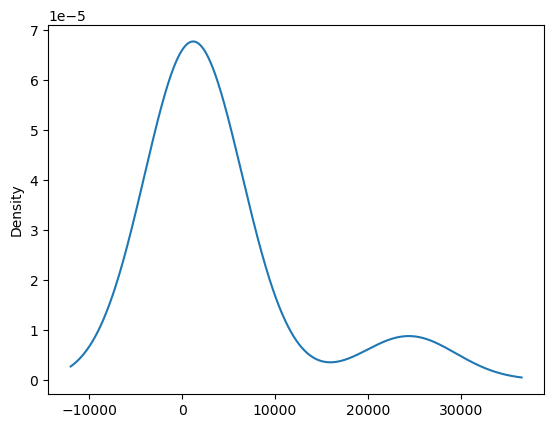

In [12]:
# Visualize the value counts of INCOME_AMT
income_amt_counts.plot.density()


In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(income_amt_counts[income_amt_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()


0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [14]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

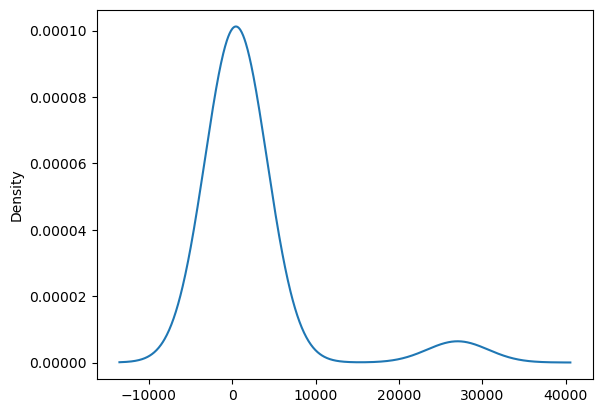

In [15]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()


In [16]:
# Determine which values to replace if counts are less than ..?
replace_class = list(application_type_counts[application_type_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [17]:
# Look at ASK_AMT value counts for binning
ask_amt_counts = application_df.ASK_AMT.value_counts()
ask_amt_counts


5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

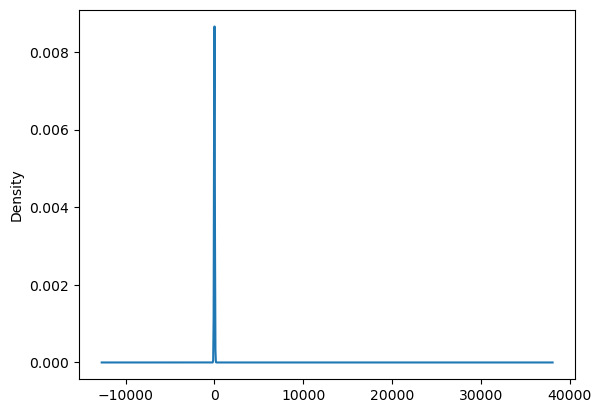

In [18]:
# Visualize the value counts of ASK_AMT
ask_amt_counts.plot.density()


In [19]:
# # Determine which values to replace if counts are less than ..?
# replace_class = list(ask_amt_counts[ask_amt_counts < 1].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.ASK_AMT.value_counts()


In [20]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat


['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()


/Users/davids_mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()


/var/folders/_4/yxrk63bj4z96czgx2nw_v8jh0000gn/T/ipykernel_98673/2947142026.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL',1).values

y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 random_state=42,
                                                 stratify=y
                                                )


/var/folders/_4/yxrk63bj4z96czgx2nw_v8jh0000gn/T/ipykernel_98673/2088887332.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop('IS_SUCCESSFUL',1).values


In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


### Compile, Train and Evaluate the Model

In [25]:
# Define the model - deep neural net, i.e., the number of input features and 
# hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 400
hidden_nodes_layer2 = 250
# hidden_nodes_layer3 = 200
# hidden_nodes_layer4 = 20
# hidden_nodes_layer5 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(
    units=hidden_nodes_layer1,
    input_dim=number_input_features,
    activation='relu')
      )

# Second hidden layer
nn.add(Dense(
    units=hidden_nodes_layer2,
    activation='relu')
      )

# Output layer
nn.add(Dense(
    units=1,
    activation='sigmoid')
      )

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               360400    
                                                                 
 dense_1 (Dense)             (None, 250)               100250    
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 460,901
Trainable params: 460,901
Non-trainable params: 0
_________________________________________________________________


2022-10-30 23:44:07.459559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"


In [27]:
# Compile the model
nn.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy']
          )

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 5
)

In [31]:
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
fit_model = nn.fit(X_train_scaled, y_train, epochs=10, callbacks=[cp_callback])


Epoch 1/10

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.5224 - accuracy: 0.7812
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.3880 - accuracy: 0.8242 
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 14/804 [..............................] - ETA: 6s - loss: 0.3934 - accuracy: 0.8214
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.3989 - accuracy: 0.8170
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.3858 - accuracy: 0.8156
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 36/804 [>.............................] - ETA: 6s - lo

346/804 [===========>..................] - ETA: 3s - loss: 0.3880 - accuracy: 0.8178
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.3879 - accuracy: 0.8178
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.3885 - accuracy: 0.8173
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.3886 - accuracy: 0.8172
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.3885 - accuracy: 0.8174
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
391/

726/804 [==========================>...] - ETA: 0s - loss: 0.3884 - accuracy: 0.8154
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.3883 - accuracy: 0.8155
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.3886 - accuracy: 0.8154
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.3889 - accuracy: 0.8153
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.3888 - accuracy: 0.8156
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epo

297/804 [==========>...................] - ETA: 3s - loss: 0.3858 - accuracy: 0.8206
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.3888 - accuracy: 0.8193
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.3896 - accuracy: 0.8177
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.3902 - accuracy: 0.8170
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.3895 - accuracy: 0.8176
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
342/

677/804 [========================>.....] - ETA: 0s - loss: 0.3878 - accuracy: 0.8167
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.3880 - accuracy: 0.8167
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.3878 - accuracy: 0.8168
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.3876 - accuracy: 0.8167
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.3876 - accuracy: 0.8168
Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5

Epoch 2: saving model to optimized_checkpoints/weights.02.hdf5
722/

238/804 [=======>......................] - ETA: 3s - loss: 0.3866 - accuracy: 0.8183
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
244/804 [========>.....................] - ETA: 3s - loss: 0.3868 - accuracy: 0.8185
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.3855 - accuracy: 0.8192
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5

Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.3859 - accuracy: 0.8187
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.3857 - accuracy: 0.8182
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5

Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.3857 - accuracy: 0.8186
Epoch 3: saving model to optimized_checkpoints/

593/804 [=====================>........] - ETA: 1s - loss: 0.3883 - accuracy: 0.8152
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.3891 - accuracy: 0.8143
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5

Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.3893 - accuracy: 0.8142
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5

Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.3899 - accuracy: 0.8135
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5

Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.3897 - accuracy: 0.8136
Epoch 3: saving model to optimized_checkpoints/weights.03.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.3888 - 

153/804 [====>.........................] - ETA: 4s - loss: 0.3857 - accuracy: 0.8133
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.3850 - accuracy: 0.8147
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.3856 - accuracy: 0.8131
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
178/804 [=====>........................] - ETA: 4s - loss: 0.3847 - accuracy: 0.8146
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.3843 - accuracy: 0.8142
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.3851 - 

529/804 [==================>...........] - ETA: 1s - loss: 0.3876 - accuracy: 0.8150
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.3872 - accuracy: 0.8152
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.3872 - accuracy: 0.8152
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.3871 - accuracy: 0.8151
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.3862 - accuracy: 0.8153
Epoch 4: saving model to optimized_checkpoints/weights.04.hdf5

Epo

100/804 [==>...........................] - ETA: 4s - loss: 0.3793 - accuracy: 0.8163
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.3768 - accuracy: 0.8197
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
115/804 [===>..........................] - ETA: 4s - loss: 0.3814 - accuracy: 0.8177
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
125/804 [===>..........................] - ETA: 4s - loss: 0.3829 - accuracy: 0.8158
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
135/804 [====>.........................] - ETA: 4s - loss: 0.3832 - accuracy: 0.8153
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
145/

480/804 [================>.............] - ETA: 2s - loss: 0.3878 - accuracy: 0.8141
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.3872 - accuracy: 0.8147
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.3872 - accuracy: 0.8148
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.3864 - accuracy: 0.8159
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.3866 - accuracy: 0.8156
Epoch 5: saving model to optimized_checkpoints/weights.05.hdf5

Epo


Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.3645 - accuracy: 0.8254
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.3613 - accuracy: 0.8274
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.3572 - accuracy: 0.8301
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.3657 - accuracy: 0.8241
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.3654 - accuracy: 0.8238
Epo


Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.3834 - accuracy: 0.8181
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.3832 - accuracy: 0.8187
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.3838 - accuracy: 0.8184
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.3842 - accuracy: 0.8181
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.3847 - accuracy: 0.8180
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epo

771/804 [===========================>..] - ETA: 0s - loss: 0.3866 - accuracy: 0.8172
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.3868 - accuracy: 0.8171
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.3865 - accuracy: 0.8174
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5

Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.3867 - accuracy: 0.8173
Epoch 6: saving model to optimized_checkpoints/weights.06.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.3866 - accuracy: 0.8174
Epoch 7/10
  1/804 [..............................] - ETA: 3s - loss: 0.4471 - accuracy: 0.7500
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimi

322/804 [===========>..................] - ETA: 3s - loss: 0.3850 - accuracy: 0.8139
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.3844 - accuracy: 0.8142
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.3841 - accuracy: 0.8146
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.3850 - accuracy: 0.8139
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8137
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
367/

702/804 [=========================>....] - ETA: 0s - loss: 0.3856 - accuracy: 0.8168
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.3856 - accuracy: 0.8170
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.3851 - accuracy: 0.8173
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.3850 - accuracy: 0.8173
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.3849 - accuracy: 0.8176
Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5

Epoch 7: saving model to optimized_checkpoints/weights.07.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.3851 - 

258/804 [========>.....................] - ETA: 3s - loss: 0.3856 - accuracy: 0.8170
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.3855 - accuracy: 0.8172
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.3841 - accuracy: 0.8183
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.3846 - accuracy: 0.8177
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.3843 - accuracy: 0.8178
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
303/

628/804 [======================>.......] - ETA: 1s - loss: 0.3855 - accuracy: 0.8173
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.3855 - accuracy: 0.8174
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.3846 - accuracy: 0.8178
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.3852 - accuracy: 0.8176
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.3855 - accuracy: 0.8172
Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5

Epoch 8: saving model to optimized_checkpoints/weights.08.hdf5
673/

193/804 [======>.......................] - ETA: 3s - loss: 0.3815 - accuracy: 0.8222
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.3816 - accuracy: 0.8225
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.3804 - accuracy: 0.8228
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.3807 - accuracy: 0.8225
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.3794 - accuracy: 0.8236
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epo


Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.3846 - accuracy: 0.8188
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.3845 - accuracy: 0.8188
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.3840 - accuracy: 0.8194
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.3844 - accuracy: 0.8193
Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5

Epoch 9: saving model to optimized_checkpoints/weights.09.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.3838 - accuracy: 0.8197
Epo


Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
146/804 [====>.........................] - ETA: 4s - loss: 0.3759 - accuracy: 0.8232
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.3747 - accuracy: 0.8240
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.3764 - accuracy: 0.8237
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.3777 - accuracy: 0.8224
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.3789 - accuracy: 0.8213
Epoch 10: saving model to optimized_checkpoints/weights.10.

510/804 [==================>...........] - ETA: 1s - loss: 0.3861 - accuracy: 0.8191
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.3875 - accuracy: 0.8189
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.3888 - accuracy: 0.8184
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.3883 - accuracy: 0.8185
Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5

Epoch 10: saving model to optimized_checkpoints/weights.10.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.3883 - accuracy: 0.8185
Epoch 10: saving model to optimized_checkpoints/weights.10.

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.8111 - accuracy: 0.7976 - 414ms/epoch - 2ms/step
Loss: 0.8111255168914795, Accuracy: 0.7975510358810425


In [33]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharityOptimized.h5')
